In [73]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def read_image(path, img_rows, img_cols, color_type=3):
    
    if color_type == 1:
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imread(path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    resized_image = cv2.resize(image, (img_cols, img_rows))
    
    return resized_image

In [74]:
def get_driver_dict():
    
    image_driver = dict()
    driver_dict = dict()
    file = open(PATH_DRIVERS, 'r')
    line = file.readline()
    
    while(True):
        line = file.readline()
        if line == '':
            break   
        array = line.strip().split(',')
        image_driver[array[2]] = array[0]
        if array[0] not in driver_dict.keys():
            driver_dict[array[0]] = [(array[1], array[2])]
        else:
            driver_dict[array[0]].append((array[1], array[2]))
    
    file.close()
    return image_driver, driver_dict

In [75]:
PATH_DRIVERS = "driver_imgs_list.csv"
CATEGORIES = ["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9"]
im, dr = get_driver_dict()

In [100]:
import random
import os
driver = random.choices(list(dr.keys()), k = 3)
im_plot = []

for j in driver:
    im_plot.extend(random.choices(dr[j], k = 5))


In [108]:
description = [
    "c0: normal driving",
    "c1: texting - right",
    "c2: talking on the phone - right",
    "c3: texting - left",
    "c4: talking on the phone - left",
    "c5: operating the radio",
    "c6: drinking",
    "c7: reaching behind",
    "c8: hair and makeup",
    "c9: talking to passenger"
]

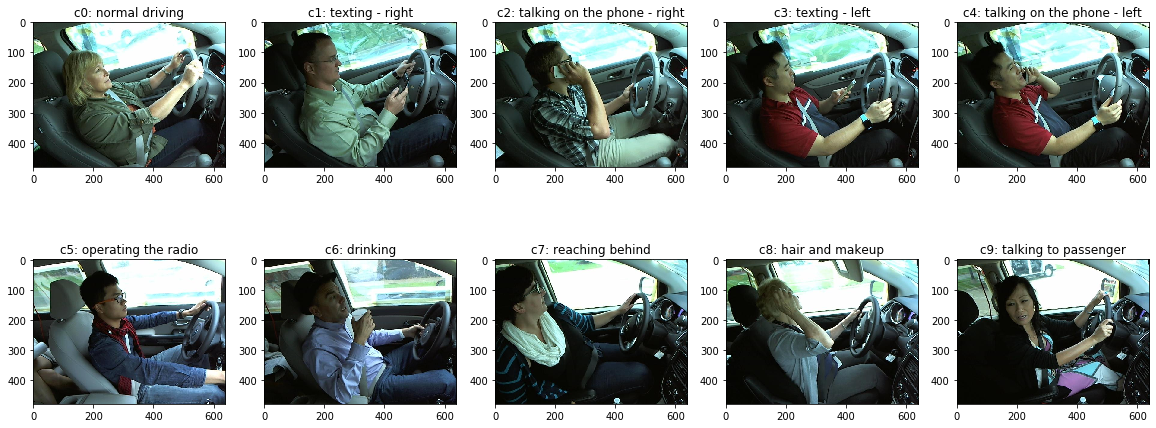

In [121]:
fig=plt.figure(figsize=(20, 8))
columns = 5
rows = 2

i = 0
for category in CATEGORIES:
    img_name = random.choice(os.listdir("imgs/train/"+category+"/"))
    img = read_image("imgs/train/" + category + "/" + img_name, 480,640,3)
    fig.add_subplot(rows, columns, i+1, title=description[i])
    #plt.set_title(description[i])
    plt.imshow(img)
    i += 1
plt.show()

In [115]:
from PIL import Image, ImageDraw
im = Image.new(mode = "RGBA",size = [1005,200])
d = ImageDraw.Draw(im)

bottom_left = (0, 0)
bottom_right = (1000, 0)
top_left = (0, 100)
top_right = (1000, 100)

line_color = (0, 0, 0)

d.line([bottom_left, bottom_right], fill=line_color, width=1)
d.line([top_left, top_right], fill=line_color, width=1)
d.line([bottom_left, top_left], fill=line_color, width=1)
d.line([bottom_right, top_right], fill=line_color, width=1)

im.save("drawn_grid.png")

In [116]:
import pandas as pd
import numpy as np

df_1 = pd.read_csv("demo_1.csv")
df_1 = df_1.drop(['Unnamed: 0'], axis=1)
df_2 = pd.read_csv("demo_2.csv")
df_2 = df_2.drop(['Unnamed: 0'], axis=1)

In [117]:
description = [
    "Normal driving",
    "Texting - right",
    "Talking on the phone - right",
    "Texting - left",
    "Talking on the phone - left",
    "Operating the radio",
    "Drinking",
    "Reaching behind",
    "Hair and makeup",
    "Talking to passenger",
    "Name",
]
df_1.columns = description
df_2.columns = description

In [119]:
for row in range(len(df_1)):
    array = np.array(df_1.iloc[row][:-1])
    im = Image.open("drawn_grid.png")
    d = ImageDraw.Draw(im)
    line_color = (0, 0, 0)
    somma = 0
    for i in range(len(array)):
        top_cut = (somma+int(array[i]),100)
        bottom_cut = (somma+int(array[i]),0)
        d.line([top_cut, bottom_cut], fill=line_color, width=1)
        somma += int(array[i])
        if (int(array[i]) > 200):
            d.text(xy=(top_cut[0]-somma,120+i*4), fill=line_color, 
                   width=1, text = description[i] + " " + str(int(np.round((array[i])/10))) +"%")

    im.save("box_images_1/box_" + str(row) + ".png")

In [120]:
for row in range(len(df_2)):
    array = np.array(df_2.iloc[row][:-1])
    im = Image.open("drawn_grid.png")
    d = ImageDraw.Draw(im)
    line_color = (0, 0, 0)
    somma = 0
    for i in range(len(array)):
        top_cut = (somma+int(array[i]),100)
        bottom_cut = (somma+int(array[i]),0)
        d.line([top_cut, bottom_cut], fill=line_color, width=1)
        somma += int(array[i])
        
        if (int(array[i]) > 200):
            d.text(xy=(top_cut[0]-somma,120+i*4), fill=line_color, 
                   width=1, text = description[i] + " " + str(int(np.round((array[i])/10))) +"%")
            
    im.save("box_images_2/box_" + str(row) + ".png")

In [121]:
col = df_1.columns[:-1]
df_1[col] = df_1[col] / 10
df_1 = df_1.round(0)
df_1.to_csv("perc_demo_1.csv")

In [122]:
df_2[col] = df_2[col] / 10
df_2 = df_2.round(0)
df_2.to_csv("perc_demo_2.csv")